In [1]:
import numpy as np,os,sys,glob
import matplotlib.pylab as plt
from ioMicro import *


In [6]:
paths = glob.glob(r'X:\DCBB_human__11_19_2022\H*_set2\Conv_zscan__020.zarr')#619,655,711,KO,135,165
ims = []
for path in paths:
    im,x,y=read_im(path,return_pos=True)
    ncols,szz,szx,szy = im.shape
    ims.append(im)
ims_ = concat(ims)

In [7]:
import napari
napari.view_image(ims_)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1399.5, 1399.5), zoom=0.1309642857142857, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(2.0, 2.0, 18.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=5, ndisplay=2, last_used=0, range=((0.0, 5.0, 1.0), (0.0, 4.0, 1.0), (0.0, 37.0, 1.0), (0.0, 2800.0, 1.0), (0.0, 2800.0, 1.0)), current_step=(2, 2, 18, 1400, 1400), order=(0, 1, 2, 3, 4), axis_labels=('0', '1', '2', '3', '4')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'ims_' at 0x2180234bf10>], scale_bar=ScaleBar(visible=False, colored=False, color=array([1., 0., 1., 1.], dtype=float32), ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, box=False, box_color=array([0. , 0. , 0. , 0.6], dtype=float32), unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1

In [1]:
import numpy as np,os,sys,glob
import matplotlib.pylab as plt
from ioMicro import *

asm = analysis_smFISH(data_folder = r'W:\DCBB_human__11_19_2022',
                 save_folder = r'W:\DCBB_human__11_19_2022_Analysis',
                 H0folder=  r'W:\DCBB_human__11_19_2022\H0*',exclude_H0=True)

sets = np.unique(['_set'+os.path.basename(fld).split('_set')[-1] for fld in asm.Qfolders if '_set' in os.path.basename(fld)])
print(list(sets))

Found files:484
Found hybe folders:8
['_set2', '_set4']


736.4488050537261

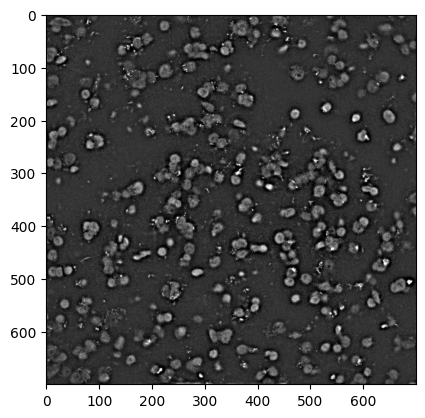

In [2]:
asm.set_set('_set2')
nfovs = len(asm.fls_bk_)
nQs = len([fld for fld in asm.Qfolders if asm.set_ in fld])
ifov = 90
iQ = 0
asm.set_fov(ifov)

get_p99(asm.fl_bk)

In [10]:
final_segmentation(asm.fl_bk,
                            analysis_folder=asm.save_folder,
                            plt_val=True,
                            rescz = 4,trimz=2, resc=4,p99=650)

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 312.21it/s]


Saved file:X:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__020--H0_set4--dapi_segm__segim.png


In [3]:
from tqdm import tqdm
asm.set_set('_set4')
nfovs = len(asm.fls_bk_)
nQs = len([fld for fld in asm.Qfolders if asm.set_ in fld])
for ifov in tqdm(np.arange(nfovs)):
    try:
        asm.set_fov(ifov)
        final_segmentation(asm.fl_bk,
                            analysis_folder=asm.save_folder,
                            plt_val=True,
                            rescz = 4,trimz=2, resc=4,p99=650)
        for iQ in range(nQs):
            
            asm.set_hybe(iQ)

            completed = asm.check_finished_file()
            if not completed:
                asm.get_background(force=False)
                asm.get_signal()
                if asm.im_sig_.shape[-1]>2800:
                    asm.im_sig_ = asm.im_sig_[...,200:-200,200:-200]
                asm.compute_drift(sz=300)
                asm.get_aligned_ims()

                imf = asm.im_sig__/asm.im_bk__
                asm.im_ration = np.array([norm_slice(im_,s=20) for im_ in imf])

                asm.dic_th = {0:1.25,1:0.5,2:1.25}
                asm.get_Xh(th = 4)
                asm.save_fits()
    except:
        print("Failed at "+str(ifov))

 16%|█████████████                                                                    | 44/274 [00:00<00:02, 84.15it/s]C:\Users\Scope3\anaconda3\envs\cellpose\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__052--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__052.zarr


 16%|█████████████                                                                    | 44/274 [00:20<00:02, 84.15it/s]

### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__052.zarr
Found drift:[ 0 -4 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__052.zarr
Found drift:[  0  -1 -11]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__052.zarr
Found drift:[ 0 -1 -6]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__052.zarr
Found drift:[ 0 -1 -1]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:57<00:00,  9.53s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.23it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__053--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__053.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__053.zarr
Found drift:[ 0 -3 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__053.zarr
Found drift:[ -1  -1 -11]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__053.zarr
Found drift:[ 0  0 -6]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__053.zarr
Found drift:[ 0  0 -1]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:56<00:00,  9.36s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 11.33it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__054--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__054.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__054.zarr
Found drift:[ 0 -3 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__054.zarr
Found drift:[ -2  -1 -10]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__054.zarr
Found drift:[ 0  0 -5]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__054.zarr
Found drift:[ 0  0 -1]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:53<00:00,  8.85s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 11.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 11.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 31.03it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__055--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__055.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__055.zarr
Found drift:[ 5 -4 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__055.zarr
Found drift:[-3 -1 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__055.zarr
Found drift:[-1  0 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__055.zarr
Found drift:[0 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:50<00:00,  8.49s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 27.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 30.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 35.43it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__056--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__056.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__056.zarr
Found drift:[ 0 -4 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__056.zarr
Found drift:[-3 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__056.zarr
Found drift:[-1 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__056.zarr
Found drift:[-1  0  0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:01<00:00, 10.25s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.33it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__057--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__057.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__057.zarr
Found drift:[ 0 -4 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__057.zarr
Found drift:[-3 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__057.zarr
Found drift:[ 0  0 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__057.zarr
Found drift:[ 0  0 -1]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:56<00:00,  9.49s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.73it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__058--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__058.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__058.zarr
Found drift:[ 1 -4 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__058.zarr
Found drift:[ -3  -1 -10]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__058.zarr
Found drift:[-2 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__058.zarr
Found drift:[-1  0  0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:52<00:00,  8.77s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 22.40it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__059--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__059.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__059.zarr
Found drift:[ 0 -4 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__059.zarr
Found drift:[ -3  -1 -10]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__059.zarr
Found drift:[-1 -1 -5]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__059.zarr
Found drift:[-1 -1 -1]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:52<00:00,  8.75s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 22.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 64.04it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__060--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__060.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__060.zarr
Found drift:[ 2 -4 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__060.zarr
Found drift:[ 0 -2 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__060.zarr
Found drift:[ 0 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__060.zarr
Found drift:[ 1 -1 -1]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:01<00:00, 10.20s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.03it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__061--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__061.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__061.zarr
Found drift:[ 1 -4 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__061.zarr
Found drift:[  0  -1 -10]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__061.zarr
Found drift:[ 0 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__061.zarr
Found drift:[0 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:05<00:00, 10.96s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.63it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__062--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__062.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__062.zarr
Found drift:[ 3 -5 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__062.zarr
Found drift:[-1 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__062.zarr
Found drift:[-2 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__062.zarr
Found drift:[ 0 -1 -1]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:48<00:00,  8.15s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 11.00it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__063--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__063.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__063.zarr
Found drift:[ 3 -5 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__063.zarr
Found drift:[ 0 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__063.zarr
Found drift:[ 0 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__063.zarr
Found drift:[ 0 -1 -1]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:49<00:00,  8.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 68.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 79.29it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 178.41it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__064--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__064.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__064.zarr
Found drift:[ 0 -4 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__064.zarr
Found drift:[ 0 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__064.zarr
Found drift:[ 0 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__064.zarr
Found drift:[0 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:48<00:00,  8.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 24.37it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__065--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__065.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__065.zarr
Found drift:[-4 -4 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__065.zarr
Found drift:[-2 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__065.zarr
Found drift:[ 0 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__065.zarr
Found drift:[-1  0 -1]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:55<00:00,  9.17s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.01it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__066--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__066.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__066.zarr
Found drift:[ 0 -2 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__066.zarr
Found drift:[-1 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__066.zarr
Found drift:[-1  0 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__066.zarr
Found drift:[0 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:57<00:00,  9.54s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.61it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__067--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__067.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__067.zarr
Found drift:[ 1 -3 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__067.zarr
Found drift:[  0  -1 -10]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__067.zarr
Found drift:[ 0  0 -5]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__067.zarr
Found drift:[0 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:57<00:00,  9.51s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.61it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__068--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__068.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__068.zarr
Found drift:[ 1 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__068.zarr
Found drift:[  0  -1 -11]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__068.zarr
Found drift:[ 0  0 -5]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__068.zarr
Found drift:[1 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:00<00:00, 10.05s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.96it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__069--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__069.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__069.zarr
Found drift:[ 0 -2 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__069.zarr
Found drift:[ 0 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__069.zarr
Found drift:[ 0 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__069.zarr
Found drift:[0 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:55<00:00,  9.19s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.83it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__070--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__070.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__070.zarr
Found drift:[ 0 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__070.zarr
Found drift:[ 0 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__070.zarr
Found drift:[ 0 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__070.zarr
Found drift:[ 0 -1 -2]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:58<00:00,  9.81s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.87it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__071--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__071.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__071.zarr
Found drift:[ 0 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__071.zarr
Found drift:[ 1 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__071.zarr
Found drift:[ 0 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__071.zarr
Found drift:[ 1 -1 -2]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:01<00:00, 10.21s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__072--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__072.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__072.zarr
Found drift:[ 0 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__072.zarr
Found drift:[ 0 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__072.zarr
Found drift:[ 0 -1 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__072.zarr
Found drift:[ 0  0 -2]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:05<00:00, 10.89s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.41it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__073--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__073.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__073.zarr
Found drift:[ 4 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__073.zarr
Found drift:[ 0 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__073.zarr
Found drift:[ 0 -1 -3]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__073.zarr
Found drift:[ 2  0 -2]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:56<00:00,  9.48s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.15it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__074--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__074.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__074.zarr
Found drift:[ 4 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__074.zarr
Found drift:[ 1 -1 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__074.zarr
Found drift:[ 0  0 -3]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__074.zarr
Found drift:[ 3  0 -2]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:58<00:00,  9.80s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.95it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__075--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__075.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__075.zarr
Found drift:[ 0 -2 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__075.zarr
Found drift:[ 0 -1 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__075.zarr
Found drift:[ 0  0 -3]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__075.zarr
Found drift:[1 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:58<00:00,  9.68s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.08it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__076--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__076.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__076.zarr
Found drift:[ 0 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__076.zarr
Found drift:[ 0 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__076.zarr
Found drift:[ 0  0 -3]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__076.zarr
Found drift:[ 0  0 -2]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:59<00:00,  9.86s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.66it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__077--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__077.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__077.zarr
Found drift:[ 2 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__077.zarr
Found drift:[ 0 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__077.zarr
Found drift:[ 0  0 -3]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__077.zarr
Found drift:[ 3  0 -2]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:59<00:00,  9.90s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.45it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__078--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__078.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__078.zarr
Found drift:[ 1 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__078.zarr
Found drift:[ 0 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__078.zarr
Found drift:[ 0  0 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__078.zarr
Found drift:[2 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:58<00:00,  9.82s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.82it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__079--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__079.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__079.zarr
Found drift:[ 0 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__079.zarr
Found drift:[-3 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__079.zarr
Found drift:[-2  0 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__079.zarr
Found drift:[0 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:01<00:00, 10.21s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.59it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__080--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__080.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__080.zarr
Found drift:[ 1 -2 -8]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__080.zarr
Found drift:[ 0  0 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__080.zarr
Found drift:[ 0  0 -3]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__080.zarr
Found drift:[1 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:00<00:00, 10.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.04it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__081--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__081.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__081.zarr
Found drift:[ 0 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__081.zarr
Found drift:[ 0  0 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__081.zarr
Found drift:[ 0  0 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__081.zarr
Found drift:[0 0 0]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:01<00:00, 10.18s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.89it/s]


Saved file:W:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__082--H0_set4--dapi_segm__segim.png
### define H0 and load background
Background file: W:\DCBB_human__11_19_2022\H0_set4\Conv_zscan__082.zarr
### load signal
Signal file: W:\DCBB_human__11_19_2022\H1_set4\Conv_zscan__082.zarr
Found drift:[ 0 -2 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H2_set4\Conv_zscan__082.zarr
Found drift:[-1 -1 -9]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H3_set4\Conv_zscan__082.zarr
Found drift:[ 0  0 -4]
### define H0 and load background
### load signal
Signal file: W:\DCBB_human__11_19_2022\H4_set4\Conv_zscan__082.zarr
Found drift:[0 0 0]


100%|██████████████████████████████████████████████████████████████████████████████| 274/274 [3:22:56<00:00, 44.44s/it]


In [9]:
print(os.path.abspath('ioMicro.py'))

C:\Users\Scope3\ScriptsScope3\ioMicro.py


In [8]:
asm.set_set('_set4')
nfovs = len(asm.fls_bk_)
nQs = len([fld for fld in asm.Qfolders if asm.set_ in fld])
ifov = 20
iQ = 0
asm.set_fov(ifov)

final_segmentation(asm.fl_bk,
                            analysis_folder=asm.save_folder,
                            plt_val=True,
                            rescz = 4,trimz=2, resc=4,p99=650)
#asm.set_hybe(iQ)

C:\Users\Scope3\anaconda3\envs\cellpose2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.21s/it]


Saved file:X:\DCBB_human__11_19_2022_Analysis\Segmentation\Conv_zscan__020--H0_set4--dapi_segm__segim.png


In [26]:
#fl_dapi = asm.fl_bk


634.4717788696394

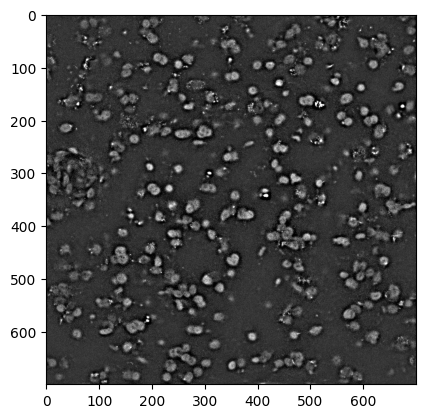

In [28]:
get_p99(asm.fl_bk)

In [8]:
??final_segmentation

In [11]:
??final_segmentation

In [12]:
fl_dapi = asm.fl_bk
im = read_im(fl_dapi)
im_mid_dapi = np.array(im[-1][im.shape[1]//2],dtype=np.float32)

In [14]:
im.shape

(4, 37, 2800, 2800)

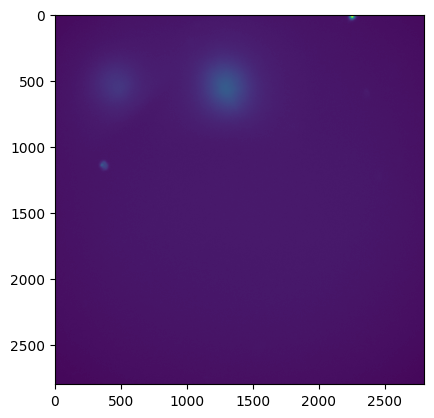

In [13]:
plt.imshow(im_mid_dapi)

In [9]:
asm.fl_bk

'X:\\DCBB_human__11_19_2022\\H0_set4\\Conv_zscan__020.zarr'

'X:\\DCBB_human__11_19_2022\\H0_set4\\Conv_zscan__020.zarr'

In [59]:
ifov = 20
iQ=2
asm.set_fov(ifov,'_set2')
asm.set_hybe(iQ)

asm.get_background(force=False)
asm.get_signal()
if asm.im_sig_.shape[-1]>2800:
    asm.im_sig_ = asm.im_sig_[...,200:-200,200:-200]
asm.compute_drift(sz=300)
asm.get_aligned_ims()

imf = asm.im_sig__/asm.im_bk__
asm.im_ration = np.array([norm_slice(im_,s=20) for im_ in imf])

### define H0 and load background
### load signal
Signal file: X:\DCBB_human__11_19_2022\H3_set2\Conv_zscan__020.zarr
Found drift:[ 1 -1 -4]


In [70]:
asm.check_finished_file()

False

In [71]:
asm.dic_th = {0:1.25,1:0.5,2:1.25}
asm.get_Xh(th = 4)
asm.save_fits()

In [62]:
asm.im_ration = np.array([norm_slice(im_,s=20) for im_ in asm.im_sig__])

In [47]:
??asm.subtract_background

In [63]:
import napari
napari.view_image(asm.im_ration)#,contrast_limits=[0,1]

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1399.0, 1397.5), zoom=0.1737763486959628, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=2, last_used=0, range=((0.0, 4.0, 1.0), (0.0, 36.0, 1.0), (0.0, 2799.0, 1.0), (0.0, 2796.0, 1.0)), current_step=(2, 18, 1399, 1398), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'Image' at 0x1b06416f070>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=Fal

Cannot find steve


In [ ]:
#asm.subtract_background(ssub=150,s=10)

In [16]:
asm.dic_drift

{'txyz': array([ -2, 198, 192]),
 'Ds': [array([ -1, 198, 191], dtype=int64),
  array([ -2, 198, 192], dtype=int64),
  array([ -2, 198, 192], dtype=int64),
  array([ -2, 198, 192], dtype=int64),
  array([ -2, 198, 192], dtype=int64)],
 'drift_fl': 'X:\\DCBB_human__11_19_2022\\H0_set2\\Conv_zscan__020.zarr'}

In [4]:

for ifov in tqdm(np.arange(214)[::-1]):
    try:
        for iQ in range(4):
            asm.set_fov(ifov,'_set1')
            asm.set_hybe(iQ)
            if os.sep+'H0' in asm.fl or os.sep+'H2' in asm.fl:
                asm.fl,asm.fl_bk = asm.fl_bk,asm.fl
                asm.fl_bk = asm.fl_bk.replace(os.sep+'H0',os.sep+'H1')

            completed = asm.check_finished_file()
            if not completed:
                asm.get_background(force=False)

                asm.get_signal()
                asm.compute_drift(sz=200)
                asm.get_aligned_ims()
                asm.subtract_background(ssub=40,s=10)

                asm.dic_th = {0:1,1:0.5,2:1.5}
                asm.get_Xh(th = 4)
                asm.save_fits()
    except:
        print("Failed at "+str(ifov))

In [9]:
import napari
napari.view_image(ims_)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1399.5, 1399.5), zoom=0.16624999999999998, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=5, ndisplay=2, last_used=0, range=((0.0, 5.0, 1.0), (0.0, 4.0, 1.0), (0.0, 37.0, 1.0), (0.0, 2800.0, 1.0), (0.0, 2800.0, 1.0)), current_step=(2, 2, 18, 1400, 1400), order=(0, 1, 2, 3, 4), axis_labels=('0', '1', '2', '3', '4')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'ims_' at 0x1ae2c2fcf70>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=Int

Cannot find steve


In [78]:
type(ims[0])

dask.array.core.Array

In [81]:

concatenate(ims)

ValueError: ('Shapes do not align: %s', [(4, 37, 2800, 2800), (4, 37, 3200, 3200), (4, 37, 3200, 3200), (4, 37, 2800, 2800), (4, 37, 2800, 2800)])

In [50]:
im = np.array(im,dtype=np.float32)

In [67]:
im_bk =  im[1]
im_sig =  im[0]
im_dapi = im[-1]

In [68]:
def remove_bk(im_sig,im_bk,resc = 5,perc=99):
    im_bk_ = im_bk[len(im_bk)//2,::resc,::resc]
    keep = im_bk_>np.percentile(im_bk_,perc)
    fr = im_sig[len(im_bk)//2,::resc,::resc][keep]/im_bk_[keep]
    fr_ = np.median(fr)
    im_sig_ = im_sig-im_bk*fr_
    return im_sig_

In [69]:
im_sig_ = remove_bk(im[0],im[1],resc = 5)
im_dapi_ = remove_bk(im[-1],im[1],resc = 5)

In [56]:
im_sig__ = norm_slice(im_sig_,s=50)

In [73]:
import napari
im_sig_i = im_sig
viewer = napari.view_image(im_sig_i,colormap='red',
                           contrast_limits=[np.percentile(im_sig_i[::2,::5,::5],10),np.percentile(im_sig_i[::2,::5,::5],99.9)])
im_sig_i = im_sig_
viewer.add_image(im_sig_i,colormap='red',
                           contrast_limits=[np.percentile(im_sig_i[::2,::5,::5],10),np.percentile(im_sig_i[::2,::5,::5],99.9)])

viewer.add_image(im_dapi_,colormap='blue')



<Image layer 'im_dapi_' at 0x184212d8bb0>

Cannot find steve


In [61]:
np.percentile(im_sig__[::2,::5,::5],10)

-178.235595703125